<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_15_Introduction_to_Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 15: Introduction to Deep Learning with PyTorch

*Based on the material of the course 'Deep Learning with Pytorch' on Udacity*
https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch

In this notebook, you'll get introduced to [PyTorch](http://pytorch.org/), a framework for building and training neural networks. PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for backpropagation!) and another module specifically for building neural networks. All together, PyTorch ends up being more coherent with Python and the Numpy/Scipy stack compared to TensorFlow and other frameworks, therefore Pytorch was the preferred tool for the course.



## Neural Networks

Deep Learning is based on artificial neural networks which have been around in some form since the late 1950s. The networks are built from individual parts approximating neurons, typically called units or simply "neurons." Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

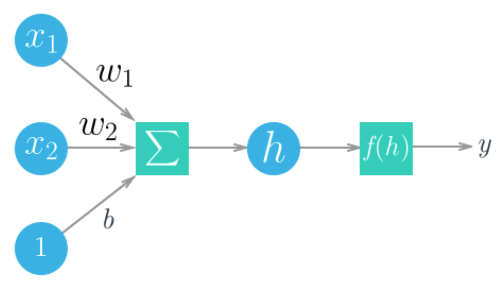

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i \right)
\end{align}
$$


With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

### Stack them up!

We can assemble these unit neurons into layers and stacks, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. With multiple input units and output units, we now need to express the weights as a matrix.

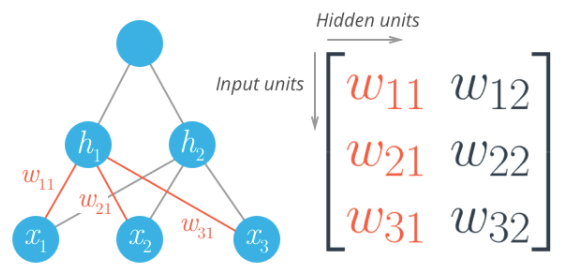

We can express this mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer ($h_1$ and $h_2$ here) can be calculated 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

## Tensors

It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

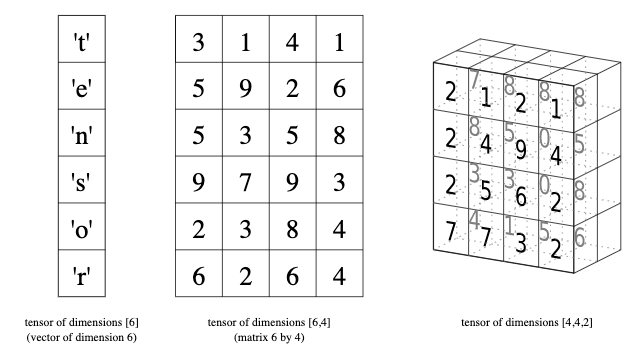

With the basics covered, it's time to explore how we can use PyTorch to build a simple neural network.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

First, let's see how we work with PyTorch tensors. These are the fundamental data structures of neural networks and PyTorch, so it's important to understand how these work.

In [ ]:
x = torch.rand(3, 2, 3)
x

tensor([[[0.0795, 0.3309, 0.4112],
         [0.0234, 0.4983, 0.3680]],

        [[0.9157, 0.9021, 0.5202],
         [0.1271, 0.3007, 0.1791]],

        [[0.0485, 0.0786, 0.4080],
         [0.8176, 0.0496, 0.8208]]])

In [ ]:
y = torch.ones(x.size())
y

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
z = x + y
z

tensor([[[1.0795, 1.3309, 1.4112],
         [1.0234, 1.4983, 1.3680]],

        [[1.9157, 1.9021, 1.5202],
         [1.1271, 1.3007, 1.1791]],

        [[1.0485, 1.0786, 1.4080],
         [1.8176, 1.0496, 1.8208]]])

In general PyTorch tensors behave similar to Numpy arrays. They are zero indexed and support slicing.

In [ ]:
z[0]

tensor([[1.0795, 1.3309, 1.4112],
        [1.0234, 1.4983, 1.3680]])

In [ ]:
z[:, 1:]

tensor([[[1.0234, 1.4983, 1.3680]],

        [[1.1271, 1.3007, 1.1791]],

        [[1.8176, 1.0496, 1.8208]]])

Tensors typically have two forms of methods, one method that returns another tensor and another method that performs the operation in place. That is, the values in memory for that tensor are changed without creating a new tensor. In-place functions are always followed by an underscore, for example `z.add()` and `z.add_()`.

In [ ]:
# Return a new tensor z + 1
z.add(1)

tensor([[[2.0795, 2.3309, 2.4112],
         [2.0234, 2.4983, 2.3680]],

        [[2.9157, 2.9021, 2.5202],
         [2.1271, 2.3007, 2.1791]],

        [[2.0485, 2.0786, 2.4080],
         [2.8176, 2.0496, 2.8208]]])

In [ ]:
# z tensor is unchanged
z

tensor([[[1.0795, 1.3309, 1.4112],
         [1.0234, 1.4983, 1.3680]],

        [[1.9157, 1.9021, 1.5202],
         [1.1271, 1.3007, 1.1791]],

        [[1.0485, 1.0786, 1.4080],
         [1.8176, 1.0496, 1.8208]]])

In [ ]:
# Add 1 and update z tensor in-place
z.add_(1)

tensor([[[2.0795, 2.3309, 2.4112],
         [2.0234, 2.4983, 2.3680]],

        [[2.9157, 2.9021, 2.5202],
         [2.1271, 2.3007, 2.1791]],

        [[2.0485, 2.0786, 2.4080],
         [2.8176, 2.0496, 2.8208]]])

In [ ]:
# z has been updated
z

tensor([[[2.0795, 2.3309, 2.4112],
         [2.0234, 2.4983, 2.3680]],

        [[2.9157, 2.9021, 2.5202],
         [2.1271, 2.3007, 2.1791]],

        [[2.0485, 2.0786, 2.4080],
         [2.8176, 2.0496, 2.8208]]])

### Reshaping

Reshaping tensors is a really common operation. First to get the size and shape of a tensor use `.size()`. Then, to reshape a tensor, use `.resize_()`. Notice the underscore, reshaping is an in-place operation.

In [ ]:
z.size()

torch.Size([3, 2, 3])

In [ ]:
z.resize_(2, 3)

tensor([[2.0795, 2.3309, 2.4112],
        [2.0234, 2.4983, 2.3680]])

In [ ]:
z

tensor([[2.0795, 2.3309, 2.4112],
        [2.0234, 2.4983, 2.3680]])

## Numpy to Torch and back

Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [ ]:
a = np.random.rand(4,3)
a

array([[0.98364208, 0.75420285, 0.91953313],
       [0.1949541 , 0.04005991, 0.5247999 ],
       [0.75151075, 0.95958567, 0.57056911],
       [0.99256296, 0.67835301, 0.9467714 ]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.9836, 0.7542, 0.9195],
        [0.1950, 0.0401, 0.5248],
        [0.7515, 0.9596, 0.5706],
        [0.9926, 0.6784, 0.9468]], dtype=torch.float64)

In [ ]:
b.numpy()

array([[0.98364208, 0.75420285, 0.91953313],
       [0.1949541 , 0.04005991, 0.5247999 ],
       [0.75151075, 0.95958567, 0.57056911],
       [0.99256296, 0.67835301, 0.9467714 ]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [ ]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[1.9673, 1.5084, 1.8391],
        [0.3899, 0.0801, 1.0496],
        [1.5030, 1.9192, 1.1411],
        [1.9851, 1.3567, 1.8935]], dtype=torch.float64)

In [ ]:
# Numpy array matches new values from Tensor
a

array([[1.96728415, 1.5084057 , 1.83906626],
       [0.38990821, 0.08011982, 1.0495998 ],
       [1.5030215 , 1.91917134, 1.14113821],
       [1.98512593, 1.35670603, 1.89354279]])